In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_dir=r'E:\archive\chest_xray\train'
test_dir=r'E:\archive\chest_xray\test'

In [3]:
train_data=ImageDataGenerator().flow_from_directory(train_dir,(150,150),shuffle=False, batch_size=5)


Found 5216 images belonging to 2 classes.


In [4]:
test_data=ImageDataGenerator().flow_from_directory(test_dir,(150,150),shuffle=False, batch_size=5)

Found 624 images belonging to 2 classes.


In [5]:
#optional
print(train_data[0][0][0].shape)
# total 4317 data below to 5 clasess
print(len(train_data)) #4317/batch size
print(len(train_data[0])) #2, 1st image, 2nd is label
#print(train_data[0])
print(len(train_data[0][0])) #1st batch of 10 data
print(len(train_data[0][0][0])) #the image, the vertical
print(len(train_data[0][0][0][0])) #the image, the horizontal
print(len(train_data[0][0][0][0][0])) #the image, RGB

(150, 150, 3)
1044
2
5
150
150
3


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation="softmax")) #depends on class
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 32)        0

Epoch 1/5
1044/1044 [==============================] - 105s 98ms/step - loss: 1.5483 - accuracy: 0.7887
Epoch 2/5
1044/1044 [==============================] - 90s 86ms/step - loss: 0.4954 - accuracy: 0.8438
Epoch 3/5
1044/1044 [==============================] - 75s 72ms/step - loss: 0.2952 - accuracy: 0.8865
Epoch 4/5
1044/1044 [==============================] - 74s 71ms/step - loss: 0.2109 - accuracy: 0.9170
Epoch 5/5
1044/1044 [==============================] - 75s 72ms/step - loss: 0.2118 - accuracy: 0.9258


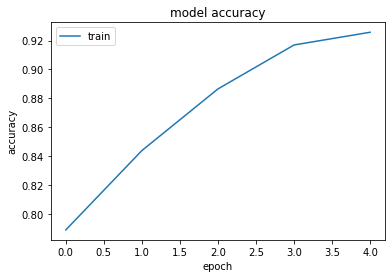

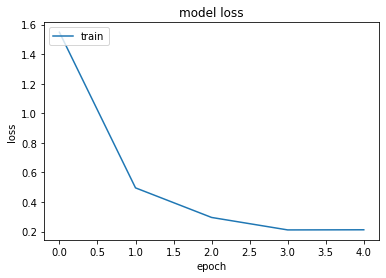

In [7]:
#remove optimizer if needed
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
h = model.fit(train_data, batch_size = 5, epochs=5)
import matplotlib.pyplot as plt
plt.plot(h.history['accuracy'])
#plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
#plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


125/125 [==============================] - 8s 48ms/step


<AxesSubplot:>

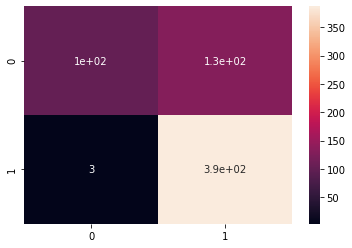

In [8]:
import seaborn as sns
pred = model.predict(test_data)
import numpy as np
pred=np.argmax(pred,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_data.classes, pred)
sns.heatmap(cm, annot=True)

In [9]:
#depends on number of classes
print((cm[0,0]+cm[1,1])/(sum(sum(cm))))

0.7852564102564102


In [10]:
from keras.models import save_model
save_model(model, "Pneumonia")

INFO:tensorflow:Assets written to: Pneumonia\assets


INFO:tensorflow:Assets written to: Pneumonia\assets


In [11]:
score = model.evaluate(test_data)
print(score)

125/125 [==============================] - 6s 47ms/step - loss: 0.8122 - accuracy: 0.7853
[0.8121611475944519, 0.7852563858032227]
